<a href="https://colab.research.google.com/github/ispineda/ProyectDataScienceM2/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color = 'yellow'> PROYECTO FINAL MÓDULO 2 </font>**

Integrantes del equipo



```
- Jonatan Rogelio Andrade Martínez (ayuda en POWER BI)
- Aline Yadira Rodríguez Becerra
- Jesús Ismael Pineda Hernández
```



## Descripción del proyecto

* Descargar el dataset del siguiente [enlace](https://raw.githubusercontent.com/devfmx/master-data-ai/main/Kata%20Proyectos/forbes-dataset-2020.csv)
* Resolver los siguientes puntos haciendo uso del dataset
    1. Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.
    2. Atleta con el menor número de apariciones y mayores ganancias.
    3. Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.
    4. País con mayor número de deportes con atletas en el dataset.
    5. ¿Cuántos atletas por deporte tiene cada país?
    6. Ganancia mínima y máxima (dentro del dataset) por deporte y por país.
    7. Atleta con mayores ganancias por deporte por década
    8. Ganancia total por cada deporte por cada año.
    9. Crea un tablero en Power BI que represente los aspectos más importantes del dataset, a tu gusto.

## Librerias

In [ ]:
# Import of libraries for data processing
import numpy as np
import pandas as pd

# Import of libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot 

### Carga del dataset

In [ ]:
# Load dataframe
# df = pd.read_csv('https://raw.githubusercontent.com/devfmx/master-data-ai/main/Kata%20Proyectos/forbes-dataset-2020.csv').drop(['S.NO'], axis=1)
df = pd.read_csv("/content/sample_data/forbes-dataset-2020.csv")
df

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


Analisis exploratorio

In [ ]:
# Dataframe details
df.info()
df.shape
df_forbes = df.copy()
df_forbes.drop('S.NO',axis=1,inplace=True)
print(df_forbes['Previous Year Rank'].unique())
print(df_forbes['Sport'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB
[nan '8' '1' '>30' '4' '5' '12' '6' '3' '9' '17' '13' '10' '>40' '19' '40'
 '7' '11' '30' '22' '20' 'not ranked' '38' '2' '15' '14' '26' 'none' '18'
 '>10' '>20' '?' '24' '21' '>14' '>100' '??']
['boxing' 'auto racing' 'golf' 'basketball' 'Basketball' 'Boxing'
 'Auto Racing' 'Golf' 'Tennis' 'NFL' 'Auto racing' 'NBA' 'Base

Limpieza de columnas

In [ ]:
df_forbes.dropna()

# Cleaning - Sport
df_forbes['Sport'] = df_forbes['Sport'].str.upper()
df_forbes['Sport'] = df_forbes['Sport'].astype(str).replace(['NBA','NFL','NASCAR','AUTO RACING (NASCAR)','ICE HOCKEY','AMERICAN FOOTBALL / BASEBALL'],['BASKETBALL','AMERICAN FOOTBALL','AUTO RACING','AUTO RACING','HOCKEY','AMERICAN FOOTBALL'])

# Cleaning - Previous Year Rank
df_forbes['Previous Year Rank'] = df_forbes['Previous Year Rank'].astype(str).replace(['nan','<NA>','?','??','none', None], 'not ranked')
df_forbes['Previous Year Rank'] = df_forbes['Previous Year Rank'].str.translate({ord('>'):None})

df_forbes

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,not ranked,BOXING,1990,28.6
1,Buster Douglas,USA,2,not ranked,BOXING,1990,26.0
2,Sugar Ray Leonard,USA,3,not ranked,BOXING,1990,13.0
3,Ayrton Senna,Brazil,4,not ranked,AUTO RACING,1990,10.0
4,Alain Prost,France,5,not ranked,AUTO RACING,1990,9.0
...,...,...,...,...,...,...,...
296,Stephen Curry,USA,6,9,BASKETBALL,2020,74.4
297,Kevin Durant,USA,7,10,BASKETBALL,2020,63.9
298,Tiger Woods,USA,8,11,GOLF,2020,62.3
299,Kirk Cousins,USA,9,100,AMERICAN FOOTBALL,2020,60.5


## 1. Deportistas cuyo ranking ha subido al menos dos lugares entre 2010 y 2020.

In [ ]:
# Copy DataFrame
df_clean_previous_rank = df_forbes.copy()

# Convert to integer 'Previous Year Rank'
df_clean_previous_rank = df_clean_previous_rank[~df_clean_previous_rank['Previous Year Rank'].isin(['not ranked'])]
df_clean_previous_rank['Previous Year Rank'] = df_clean_previous_rank['Previous Year Rank'].astype(int)

# Filtering of records from 2010 to 2020
df_rank_2010_2011 = df_clean_previous_rank[df_clean_previous_rank['Year'].isin(range(2010,2021))]

print(df_rank_2010_2011.shape) # Dimension

df_rank_2010_2011

(101, 7)


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
191,Tiger Woods,USA,1,1,GOLF,2010,105.0
192,Floyd Mayweather,USA,2,10,BOXING,2010,65.0
193,Kobe Bryant,USA,3,2,BASKETBALL,2010,48.0
194,Phil Mickelson,USA,4,6,GOLF,2010,46.0
195,David Beckham,UK,5,5,SOCCER,2010,43.7
...,...,...,...,...,...,...,...
296,Stephen Curry,USA,6,9,BASKETBALL,2020,74.4
297,Kevin Durant,USA,7,10,BASKETBALL,2020,63.9
298,Tiger Woods,USA,8,11,GOLF,2020,62.3
299,Kirk Cousins,USA,9,100,AMERICAN FOOTBALL,2020,60.5


## 2. Atleta con el menor número de apariciones y mayores ganancias.

In [ ]:
# Athletes who have moved up at least two positions in the rankings

current_rank = df_rank_2010_2011['Current Rank']
up_previous_rank = df_rank_2010_2011['Previous Year Rank'] - 2
ranked_up = df_rank_2010_2011[ current_rank <= up_previous_rank ]

print(ranked_up.shape)
ranked_up = ranked_up.sort_values(by='Previous Year Rank', ascending = False)
ranked_up

(45, 7)


,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
300,Carson Wentz,USA,10,100,AMERICAN FOOTBALL,2020,59.1
279,Matt Ryan,USA,9,100,AMERICAN FOOTBALL,2018,67.3
271,Floyd Mayweather,USA,1,100,BOXING,2018,285.0
240,Matt Ryan,USA,10,100,AMERICAN FOOTBALL,2014,43.8
280,Matthew Stafford,USA,10,100,AMERICAN FOOTBALL,2018,59.5
299,Kirk Cousins,USA,9,100,AMERICAN FOOTBALL,2020,60.5
274,Conor McGregor,Ireland,4,24,MMA,2018,99.0
212,Manny Pacquiao,Filipino,2,24,BOXING,2012,62.0
219,Cristiano Ronaldo,Portugal,9,21,SOCCER,2012,42.5
257,Cam Newton,USA,7,20,AMERICAN FOOTBALL,2016,53.1


In [ ]:
# Appearance count per athlete
appearance_count_athlete = df_forbes['Name'].value_counts().reset_index()
appearance_count_athlete.columns = ['Name','Count']
appearance_count_athlete

filter_minor_appearances = (appearance_count_athlete['Count'] == 1)
minor_appearances = appearance_count_athlete[ filter_minor_appearances ]
minor_appearances

# Total earnings per athlete
earnings_athlete = df_forbes.groupby('Name').sum()['earnings ($ million)'].reset_index()
earnings_athlete

earnings_appearances = minor_appearances.merge(earnings_athlete, on = 'Name').sort_values('earnings ($ million)', ascending = False)
top_earnings_appearances = earnings_appearances.head(10)
top_earnings_appearances

,Name,Count,earnings ($ million)
15,Conor McGregor,1,99.0
8,Canelo Alvarez,1,94.0
14,Russell Wilson,1,89.5
4,Aaron Rogers,1,89.3
3,Kirk Cousins,1,60.5
0,Matthew Stafford,1,59.5
37,Carson Wentz,1,59.1
5,Novak Djokovic,1,55.8
32,Muhammad Ali,1,55.0
7,Cam Newton,1,53.1


In [ ]:
#Athlete with less appearances and best earnings
athlete_earnings_appearances = top_earnings_appearances['earnings ($ million)'].idxmax()
athlete_earnings_appearances = top_earnings_appearances.loc[athlete_earnings_appearances,['Name','Count','earnings ($ million)']]
athlete_earnings_appearances

Name                    Conor McGregor
Count                                1
earnings ($ million)              99.0
Name: 15, dtype: object

In [ ]:
#Plotting athletes with less appearances and best earnings
trace = go.Bar(
  y =  top_earnings_appearances['Name'],
  x = top_earnings_appearances['earnings ($ million)'],
  orientation='h',
  marker = dict(color='plum',
                line=dict(color='black',width=1)),
  )
data = [trace]
layout = go.Layout(barmode = "group",title='Athlete with less appearances and best earnings', width=800, height=500, 
                   xaxis= dict(title='Earnings ($ millions)'),
                   yaxis = dict(title='Athlete', autorange="reversed"),
                   showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## 3. Deporte y país con mayor número de atletas no rankeados que entraron en la lista de atletas mejor pagados.

In [ ]:
# Preparing original DataFrame, changing data type in interested column
df_previous_year_rank = df_forbes.copy()

In [ ]:
# Filter Not ranked in Previous Year Rank
df_not_ranked = df_previous_year_rank[df_previous_year_rank['Previous Year Rank'] == 'not ranked']
df_not_ranked

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,not ranked,BOXING,1990,28.6
1,Buster Douglas,USA,2,not ranked,BOXING,1990,26.0
2,Sugar Ray Leonard,USA,3,not ranked,BOXING,1990,13.0
3,Ayrton Senna,Brazil,4,not ranked,AUTO RACING,1990,10.0
4,Alain Prost,France,5,not ranked,AUTO RACING,1990,9.0
5,Jack Nicklaus,USA,6,not ranked,GOLF,1990,8.6
6,Greg Norman,Australia,7,not ranked,GOLF,1990,8.5
7,Michael Jordan,USA,8,not ranked,BASKETBALL,1990,8.1
8,Arnold Palmer,USA,8,not ranked,GOLF,1990,8.1
9,Evander Holyfield,USA,8,not ranked,BOXING,1990,8.1


In [ ]:
#Country with "no ranked" majority
df_not_ranked_Nationality = df_not_ranked.value_counts(['Nationality']).reset_index().rename(columns={0:'Count "not ranked"'})
Country_no_ranked = df_not_ranked_Nationality['Nationality'].head(1)

print(Country_no_ranked)
df_not_ranked_Nationality

0    USA
Name: Nationality, dtype: object


,Nationality,"Count ""not ranked"""
0,USA,27
1,Australia,1
2,Brazil,1
3,Canada,1
4,France,1
5,Germany,1
6,Russia,1
7,UK,1


In [ ]:
#Plotting Country with "no ranked" majority
trace = go.Bar(
  y =  df_not_ranked_Nationality['Nationality'],
  x = df_not_ranked_Nationality['Count "not ranked"'],
  orientation='h',
  marker = dict(color='hotpink',),)
data = [trace]
layout = go.Layout(barmode = "group",title='Country with no ranked majority', width=800, height=500, 
                   xaxis= dict(title='Number of Not Ranked'),
                   yaxis = dict(title='Country',autorange="reversed"),
                   showlegend=False)
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
#Sport with "no ranked" majority
df_not_ranked_Sport = df_not_ranked.value_counts(['Sport']).reset_index().rename(columns={0:'Count'})
Sport_no_ranked = df_not_ranked_Sport['Sport'].head(1)

print(Sport_no_ranked)
df_not_ranked_Sport

0    BOXING
Name: Sport, dtype: object


,Sport,Count
0,BOXING,8
1,BASKETBALL,7
2,AMERICAN FOOTBALL,6
3,GOLF,5
4,AUTO RACING,4
5,HOCKEY,2
6,BASEBALL,1
7,F1 MOTORSPORTS,1


## 4. País con mayor número de deportes con atletas en el dataset.

In [ ]:
# Country with the largest number of sports
count_sports_nationality = df_forbes.copy()

count_sports_nationality = count_sports_nationality[['Nationality','Sport']].groupby(['Nationality']).nunique().reset_index()
count_sports_nationality.columns = ['Nationality','count_sports']

count_sports_nationality = count_sports_nationality.sort_values('count_sports', ascending = False)
count_sports_nationality

,Nationality,count_sports
21,USA,8
4,Canada,3
9,Germany,3
20,UK,2
3,Brazil,2
13,Northern Ireland,1
19,Switzerland,1
18,Spain,1
17,Serbia,1
16,Russia,1


In [ ]:
#Country with majority of sports in the Dataset
most_sports_nationality = count_sports_nationality['count_sports'].idxmax()
most_sports_nationality= count_sports_nationality.loc[most_sports_nationality,['Nationality','count_sports']]
most_sports_nationality


Nationality     USA
count_sports      8
Name: 21, dtype: object

In [ ]:
#Plotting countries with its sports number
fig = px.treemap(count_sports_nationality, 
                 path=[px.Constant("all"), 
                       'Nationality'], 
                 values='count_sports')

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## 5. ¿Cuántos atletas por deporte tiene cada país?

In [ ]:
# Number of athletes per sport in each country
count_country_athlete = df_forbes.copy()

count_country_athlete['Athletes'] = 1
count_country_athlete = count_country_athlete[['Nationality','Sport','Athletes']].groupby(['Nationality','Sport']).count().reset_index()
count_country_athlete = count_country_athlete.sort_values('Nationality')

count_country_athlete

,Nationality,Sport,Athletes
0,Argentina,SOCCER,9
1,Australia,GOLF,1
2,Austria,AUTO RACING,1
3,Brazil,AUTO RACING,4
4,Brazil,SOCCER,5
5,Canada,AUTO RACING,2
6,Canada,BOXING,1
7,Canada,HOCKEY,3
8,Dominican,BASEBALL,1
9,Filipino,BOXING,1


In [ ]:
# Plotting number of athletes per sport in each country

fig = px.treemap(count_country_athlete, 
                 path=[px.Constant("all"), 
                       'Nationality', 
                       'Sport'], 
                 values='Athletes')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

## 6. Ganancia mínima y máxima (dentro del dataset) por deporte y por país.

In [ ]:
#Country
df_Earnings_Nationality = df_forbes.groupby('Nationality').agg({'earnings ($ million)':[np.max,np.min]})
df_Earnings_Nationality.columns=['Max','Min']
df_Earnings_Nationality = df_Earnings_Nationality.reset_index()
df_Earnings_Nationality.sort_values(by = ['Max','Min'],ascending = [False,True])

,Nationality,Max,Min
21,USA,300.0,8.1
14,Philippines,160.0,40.0
0,Argentina,127.0,32.3
15,Portugal,109.0,38.0
19,Switzerland,106.3,35.0
3,Brazil,105.0,10.0
10,Ireland,99.0,99.0
12,Mexico,94.0,94.0
9,Germany,80.0,15.0
6,Filipino,62.0,62.0


Text(0, 0.5, 'Earning')

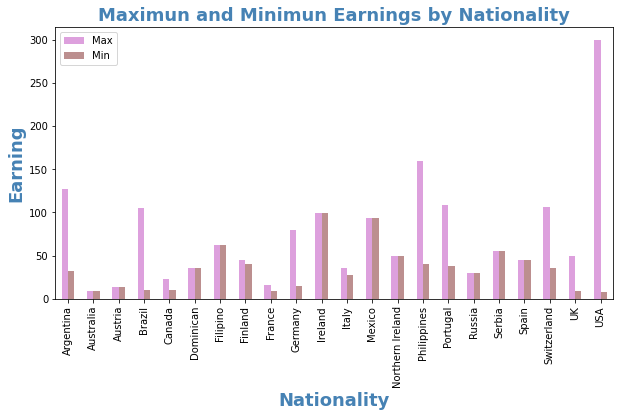

In [ ]:
#Plotting Earnings by Nationality
df_Earnings_Nationality = df_Earnings_Nationality.plot(kind='bar', x='Nationality', y=['Max','Min'], color=['plum','rosybrown'], figsize=(10,5))
# Title
plt.title("Maximun and Minimun Earnings by Nationality",fontweight='bold', color = 'steelblue', fontsize='18')
# Axis label
plt.xlabel('Nationality', fontweight='bold', color = 'steelblue', fontsize='18')
plt.ylabel('Earning', fontweight='bold', color = 'steelblue', fontsize='18')

In [ ]:
#Sport
df_Earnings_Sport = df_forbes.groupby('Sport').agg({'earnings ($ million)':[np.max,np.min]})
df_Earnings_Sport.columns=['Max','Min']
df_Earnings_Sport = df_Earnings_Sport.reset_index()
df_Earnings_Sport.sort_values(by = ['Max','Min'],ascending = [False,True])


,Sport,Max,Min
4,BOXING,300.0,8.1
12,SOCCER,127.0,28.0
8,GOLF,115.0,8.1
13,TENNIS,106.3,8.5
10,MMA,99.0,99.0
0,AMERICAN FOOTBALL,89.5,9.5
3,BASKETBALL,89.0,8.1
7,F1 RACING,80.0,34.0
6,F1 MOTORSPORTS,75.0,33.0
1,AUTO RACING,59.0,9.0


Text(0, 0.5, 'Earning')

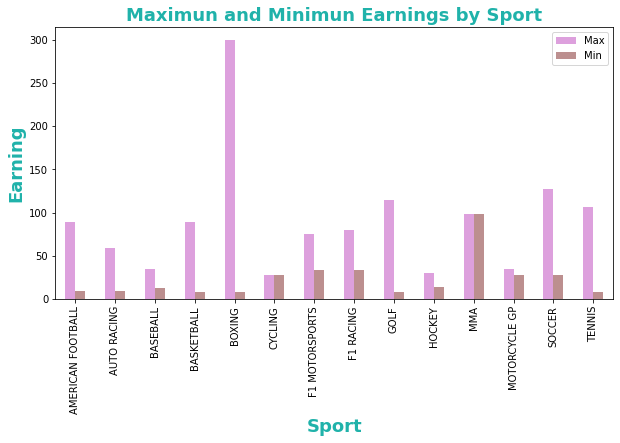

In [ ]:
#Plotting Earnings by Sport
df_Earnings_Sport = df_Earnings_Sport.plot(kind='bar', x='Sport', y=['Max','Min'], color=['plum','rosybrown'],figsize=(10,5))
# Title
plt.title("Maximun and Minimun Earnings by Sport",fontweight='bold', color = 'lightseagreen', fontsize='18')
# Axis label
plt.xlabel('Sport', fontweight='bold', color = 'lightseagreen', fontsize='18')
plt.ylabel('Earning', fontweight='bold', color = 'lightseagreen', fontsize='18')


## 7. Atleta con mayores ganancias por deporte por década

In [ ]:
# Checking the unique values
df_forbes['Year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [ ]:
# Copy dataframe
more_earnings_decades = df_forbes.copy()

# Period classifier - decades
years = 10

# Year min - max
min_year = min(more_earnings_decades['Year'])
max_year = max(more_earnings_decades['Year'])

# Intervals per decade
decades = list(range(min_year, max_year + years + 1, years))
intervals_decades = [[decades[i], decades[i+1]-1] for i,_ in enumerate(decades) if len(decades)-1 > i]

# Function to define decadal intervals from year limits
def decades_range(year):
  for intervals in intervals_decades:
    if intervals[0] <= year <= intervals[1]:
      return str(intervals[0]) + '-' + str(intervals[1]) # return the concatenation
  return None

# Inserts or updates Intervals.Year column in case of
more_earnings_decades['Intervals.Decade'] = more_earnings_decades['Year'].apply(decades_range)
more_earnings_decades

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),Intervals.Decade
0,Mike Tyson,USA,1,not ranked,BOXING,1990,28.6,1990-1999
1,Buster Douglas,USA,2,not ranked,BOXING,1990,26.0,1990-1999
2,Sugar Ray Leonard,USA,3,not ranked,BOXING,1990,13.0,1990-1999
3,Ayrton Senna,Brazil,4,not ranked,AUTO RACING,1990,10.0,1990-1999
4,Alain Prost,France,5,not ranked,AUTO RACING,1990,9.0,1990-1999
...,...,...,...,...,...,...,...,...
296,Stephen Curry,USA,6,9,BASKETBALL,2020,74.4,2020-2029
297,Kevin Durant,USA,7,10,BASKETBALL,2020,63.9,2020-2029
298,Tiger Woods,USA,8,11,GOLF,2020,62.3,2020-2029
299,Kirk Cousins,USA,9,100,AMERICAN FOOTBALL,2020,60.5,2020-2029


In [ ]:
more_earnings_decades.to_csv('file.csv', index = False)

In [ ]:
# Highest earning athlete by sport
more_earnings_decades = more_earnings_decades[['Intervals.Decade','Sport','Name','earnings ($ million)']].groupby(['Intervals.Decade','Sport','Name']).sum().reset_index()
top_earnings_decades = more_earnings_decades.groupby(['Intervals.Decade','Sport']).max()
top_earnings_decades

Name  earnings ($ million)
Intervals.Decade Sport                                                      
1990-1999        AMERICAN FOOTBALL         Joe Montana                  22.5
                 AUTO RACING             Nigel Mansell                  69.7
                 BASEBALL               Gary Sheffield                  17.2
                 BASKETBALL           Shaquille O'Neal                 409.8
                 BOXING              Sugar Ray Leonard                 235.1
                 F1 MOTORSPORTS     Michael Schumacher                 106.0
                 GOLF                      Tiger Woods                  99.9
                 HOCKEY                  Wayne Gretzky                  29.8
                 TENNIS                   Monica Seles                  53.6
2000-2009        AMERICAN FOOTBALL           Tom Brady                  42.0
                 AUTO RACING        Michael Schumacher                  59.0
                 BASEBALL               Alex Rodriguez                  81.2
                 BASKETBALL           Shaquille O'Neal                 329.0
                 BOXING               Oscar De La Hoya                 134.0
                 CYCLING               Lance Armstrong                  28.0
                 F1 MOTORSPORTS     Michael Schumacher                 142.0
                 F1 RACING          Michael Schumacher                 234.0
                 GOLF                      Tiger Woods                 782.3
                 MOTORCYCLE GP         Valentino Rossi                 128.0
                 SOCCER                     Ronaldinho                 185.5
                 TENNIS                  Roger Federer                  52.2
2010-2019        AMERICAN FOOTBALL       Terrell Suggs                 111.1
                 AUTO RACING            Lewis Hamilton                  46.0
                 BASEBALL               Alex Rodriguez                  35.0
                 BASKETBALL              Stephen Curry                 678.6
                 BOXING                 Manny Pacquiao                 840.0
                 F1 RACING          Michael Schumacher                  34.0
                 GOLF                      Tiger Woods                 429.3
                 MMA                    Conor McGregor                  99.0
                 SOCCER                         Neymar                 682.1
                 TENNIS                  Roger Federer                 639.8
2020-2029        AMERICAN FOOTBALL        Kirk Cousins                  60.5
                 BASKETBALL              Stephen Curry                  88.2
                 GOLF                      Tiger Woods                  62.3
                 SOCCER                         Neymar                 105.0
                 TENNIS                  Roger Federer                 106.3

## 8. Ganancia total por cada deporte por cada año.

In [ ]:
# Copy DataFrame
earning_total_sport_year = df_forbes.copy()

# Total earnings for each sport for each year
earning_total_sport_year = earning_total_sport_year[['Year','Sport','earnings ($ million)']].groupby(['Year','Sport']).sum()
earning_total_sport_year.columns = ['Total earnings - millions']
earning_total_sport_year

Total earnings - millions
Year Sport                                       
1990 AUTO RACING                             19.0
     BASKETBALL                               8.1
     BOXING                                  75.7
     GOLF                                    25.2
1991 AUTO RACING                             33.0
...                                           ...
2020 AMERICAN FOOTBALL                      119.6
     BASKETBALL                             226.5
     GOLF                                    62.3
     SOCCER                                 304.5
     TENNIS                                 106.3

[173 rows x 1 columns]